# Problem Statement

In [1]:
# import warnings

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding

In [4]:
# load data
lead_score = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead_score.shape

(9240, 37)

In [7]:
# concise summary of the DataFrame's structure
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# getting the descriptive statistics of all the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# list of all the column names
lead_score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# check if any duplicates in our DataFrame
lead_score.duplicated().sum()

0

# Data Pre-processing

### Data Cleaning

-  There are few categorical values that have 'select' as a level which indicates that a user might not have choosen any option from the dropdown menu and thus we can replace this with NaN.

In [11]:
# Handling the 'select' level present in few of the categorical variables
lead_score = lead_score.replace('Select' , np.nan)

In [12]:
# Checking for missing values
missing_value_percentage = round(lead_score.isnull().mean() * 100 ,2)

missing_value_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# Filter the columns to drop those with missing values above 40%
columns_to_drop = missing_value_percentage[missing_value_percentage > 40].index

# view the columns to drop
columns_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
# dropping the columns having missing values > 40%
lead_score.drop(columns = columns_to_drop , inplace=True)

In [15]:
# check missing percentage again
round(lead_score.isnull().mean() *100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

-  There are still few columns with higher missing values, such as 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'; let us analysis them and understand the distribution of different values in these columns.

In [16]:
# Check the value counts for the 'Country' column
lead_score['Country'].value_counts(normalize = True) *100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

-  As we can see that majority of leads are from India, with 6492 entries and the counts for other countries are significantly lower, so we fill the missing values with 'India' and combine rest of the countries into a single category named "Others".

In [17]:
# Fill missing values in the 'Country' column with 'India'
lead_score['Country'].fillna('India', inplace=True)

In [18]:
# replace all countries except India with 'Others'
lead_score['Country'] = lead_score['Country'].apply(lambda x: 'India' if x == 'India' else 'Others')

In [19]:
# lets again check distribution
round(lead_score['Country'].value_counts(normalize = True) *100, 2)

Country
India     96.89
Others     3.11
Name: proportion, dtype: float64

-  Majority of leads or potential leads i.e. approximately 96.89%, are from India. The remaining countries contribute to only about 3.11%. This highly imbalanced distribution may not provide significant predictive value for our model thus we drop it.

In [20]:
# Drop the 'Country' column
lead_score.drop(columns=['Country'], inplace=True)

In [21]:
# Replace missing values in the 'Specialization' column with 'Not Provided'
lead_score['Specialization'].fillna('Not Provided', inplace=True)

In [22]:
lead_score['Specialization'].value_counts(normalize = True) *100

Specialization
Not Provided                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

-  Due to the large number of specialization fields and the presence of low data counts in many categories, it's beneficial to combine similar domains to improve data representation also this reduces the number of unique labels that will help during the creation of dummy variables.

In [23]:
# combining similar specialization
lead_score['Specialization'] = lead_score['Specialization'].replace(['Finance Management', 'Banking, Investment And Insurance', 'E-COMMERCE'], 'Finance and Banking')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Marketing Management', 'Retail Management', 'Media and Advertising'], 'Marketing and Sales')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Business Administration','International Business','E-Business','Rural and Agribusiness','IT Projects Management'], 'Business Administration and IT')
lead_score['Specialization'] = lead_score['Specialization'].replace(['Operations Management','Supply Chain Management','Travel and Tourism','Services Excellence','Healthcare Management','Human Resource Management','Hospitality Management'], 'Operations and Others')

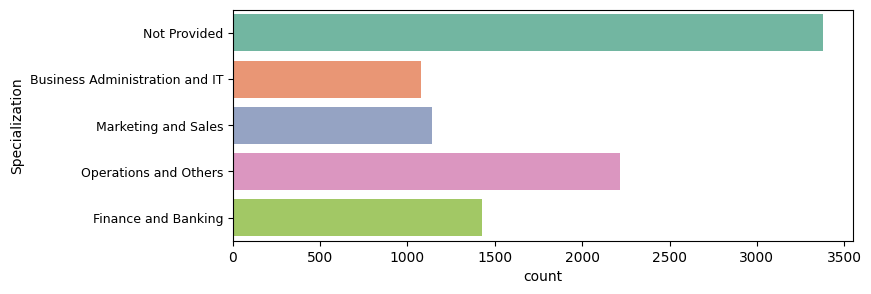

In [24]:
#lets visualize how skewed the data is
plt.figure(figsize= [8,3])
sns.countplot(lead_score['Specialization'], palette ="Set2")
plt.yticks(fontsize = 9)
plt.show()

-  A significant portion of the data indicates missing information, the remaining categories are combined for clarity and for easy interpretation. 

In [25]:
# Replace missing values in the 'What is your current occupation' column with 'Not Provided'
lead_score['What is your current occupation'].fillna('Not Provided', inplace=True)

In [26]:
# Check the value counts for the 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [27]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Businessman'], 'Working Professional')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Housewife','Other'], 'Others')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Not Provided'], 'Unemployed')

In [28]:
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              89.718615
Working Professional     7.727273
Student                  2.272727
Others                   0.281385
Name: proportion, dtype: float64

In [29]:
# Replace missing values in the 'What matters most to you in choosing a course' column with 'Not Provided'
lead_score['What matters most to you in choosing a course'].fillna('Not Provided', inplace=True)

In [30]:
# Check the value counts for the 'What matters most to you in choosing a course' column
lead_score['What matters most to you in choosing a course'].value_counts(normalize = True) *100

What matters most to you in choosing a course
Better Career Prospects      70.649351
Not Provided                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

-  the 'What matters most to you in choosing a course' column is highly imbalanced, with the vast majority of entries falling under 'Better Career Prospects.' In cases like this, the imbalance can result in the feature providing little to no meaningful contribution to a predictive model.

In [31]:
# Drop the 'What matters most to you in choosing a course' column
lead_score.drop(columns=['What matters most to you in choosing a course'], inplace=True)

In [32]:
# Replace missing values in the 'Tags' column with 'Not Provided'
lead_score['Tags'].fillna('Not Provided', inplace=True)

In [33]:
# Check the value counts for the 'Tags' column
lead_score['Tags'].value_counts(normalize = True) *100

Tags
Not Provided                                         36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

-  The 'Tags' column represents various statuses of leads, with a significant portion labeled as "Not Provided" (36.29%), as the tags may not provide useful predictive information for identifying "hot leads" and do not appear to add significant value for predictive modeling we drop it.

In [34]:
# Drop the 'Tags' column
lead_score.drop(columns=['Tags'], inplace=True)

In [35]:
# Replace missing values in the 'City' column with 'Not Specified'
lead_score['City'].fillna('Not Specified', inplace=True)

In [36]:
# Check the value counts for the 'City' column
lead_score['City'].value_counts(normalize = True) *100

City
Not Specified                  39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

-  To reduce the number of unique values and simplify the data representation, we will combine similar categories in the 'City' column.
-  The 'Not Specified' category, representing missing values, constitutes a significant portion of the data, imputing these missing values with the mode 'Mumbai' would create a substantial imbalance and could negatively impact the model's performance. Instead, we will keep 'Not Specified' as a separate category to avoid introducing bias and preserve the data's original distribution.

In [37]:
# merge similar labels
lead_score['City'] = lead_score['City'].replace({ 'Other Cities': 'Other Cities',
                                                 'Other Metro Cities': 'Other Cities',
                                                 'Tier II Cities': 'Other Cities',
                                                 'Thane & Outskirts': 'Other Cities of Maharashtra'
})

In [38]:
# Check the value counts after merging
print(lead_score['City'].value_counts(normalize=True) * 100)

City
Not Specified                  39.707792
Mumbai                         34.870130
Other Cities of Maharashtra    13.084416
Other Cities                   12.337662
Name: proportion, dtype: float64


In [39]:
round(lead_score.isnull().mean() * 100 ,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

-  The columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit', and 'Last Activity' have small proportions of missing values which are less than 4-5% so to simplify the data preparation process and ensure the integrity of our dataset, we can safely drop the rows.

In [40]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

In [41]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

-  There are some columns in this dataset that have only one single value. 

In [43]:
# Check the unique value counts for the specified columns
print(lead_score['I agree to pay the amount through cheque'].value_counts())
print(lead_score['Update me on Supply Chain Content'].value_counts())
print(lead_score['Get updates on DM Content'].value_counts())
print(lead_score['Receive More Updates About Our Courses'].value_counts())

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64
Update me on Supply Chain Content
No    9074
Name: count, dtype: int64
Get updates on DM Content
No    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64


-  Columns with only one unique value like 'No', might not contribute meaningful information that could help in predicting the target variable.

In [44]:
# drop columns with a single unique value
col_to_drop = ['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses']
lead_score.drop(columns=col_to_drop, inplace=True)

In [46]:
lead_score.shape

(9074, 23)

In [45]:
lead_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity           

In [48]:
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,Not Specified,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,Not Specified,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration and IT,Student,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened


In [49]:
# to get the number of unique values for each column
unique_values = pd.DataFrame({'Column Name': lead_score.columns, 'Unique Values': [lead_score[col].nunique() for col in lead_score.columns]})
unique_values = unique_values.sort_values(by='Unique Values')
print(unique_values)

                               Column Name  Unique Values
14                                Magazine              1
19                 Through Recommendations              2
4                             Do Not Email              2
5                              Do Not Call              2
6                                Converted              2
18                   Digital Advertisement              2
17                               Newspaper              2
16                      X Education Forums              2
15                       Newspaper Article              2
21  A free copy of Mastering The Interview              2
13                                  Search              2
20                                    City              4
2                              Lead Origin              4
12         What is your current occupation              4
11                          Specialization              5
22                   Last Notable Activity             16
10            

### Handling Outliers

In [50]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


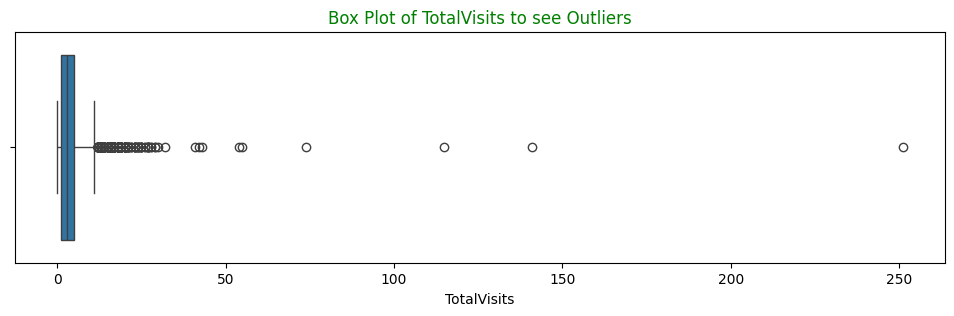

In [51]:
# checking outliers for TotalVisits 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score.TotalVisits)
plt.title('Box Plot of TotalVisits to see Outliers', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

-  In the TotalVisits column, which indicates the total number of visits made by the customer to the website, the maximum value is 251 which seems abnormally high and likely represents erroneous data.

In [60]:
# check the dataset for values of TotalVisits above 20
lead_score[lead_score['TotalVisits'] > 20]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
345,b852d04d-932a-4afd-8ab6-5be1b22ca1cf,656743,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,Operations and Others,Unemployed,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,Page Visited on Website,Operations and Others,Unemployed,No,No,No,No,No,No,No,Mumbai,Yes,Page Visited on Website
663,f45f8039-d948-4004-9e1b-c56efbab9747,653687,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,Marketing and Sales,Unemployed,No,No,No,No,No,No,No,Other Cities of Maharashtra,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,Page Visited on Website,Marketing and Sales,Unemployed,No,No,No,No,No,No,No,Other Cities,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,SMS Sent,Finance and Banking,Unemployed,No,No,No,No,No,No,No,Other Cities of Maharashtra,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,Olark Chat Conversation,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Other Cities,No,Olark Chat Conversation
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Other Cities,Yes,Modified
2289,082ee6a1-e140-4d68-b88e-2a062e075e50,637608,Landing Page Submission,Google,No,No,1,21.0,1198,5.25,View in browser link Clicked,Operations and Others,Unemployed,No,No,No,No,No,No,No,Other Cities of Maharashtra,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,Operations and Others,Unemployed,No,No,No,No,No,No,No,Mumbai,Yes,Page Visited on Website


-  From the above analysis it seems that few of the leads who visited the website more than 20 times have been converted but the rest seem outliers and they can skew the distribution, leading to biased estimates, and potentially mislead the model, so we drop them.

In [61]:
# Filter the DataFrame to include only rows where TotalVisits is less than or equal to 30
lead_score = lead_score[lead_score['TotalVisits'] <= 30]

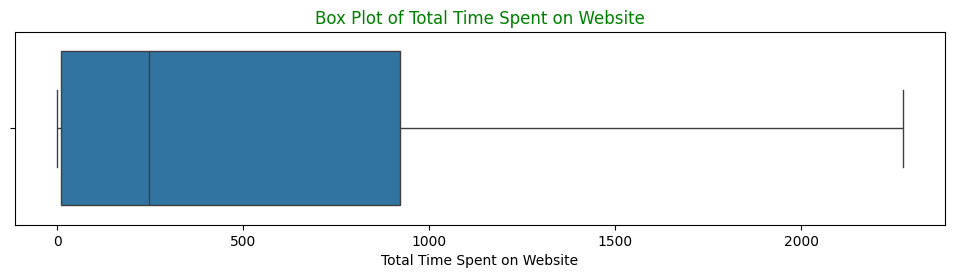

In [64]:
# checking outliers for Total Time Spent on Website 
plt.figure(figsize=[12,2.5])
sns.boxplot(x = lead_score['Total Time Spent on Website'])
plt.title('Box Plot of Total Time Spent on Website', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

- Since there are no outliers for 'Total Time Spent on Website', we dont need outlier treatment.

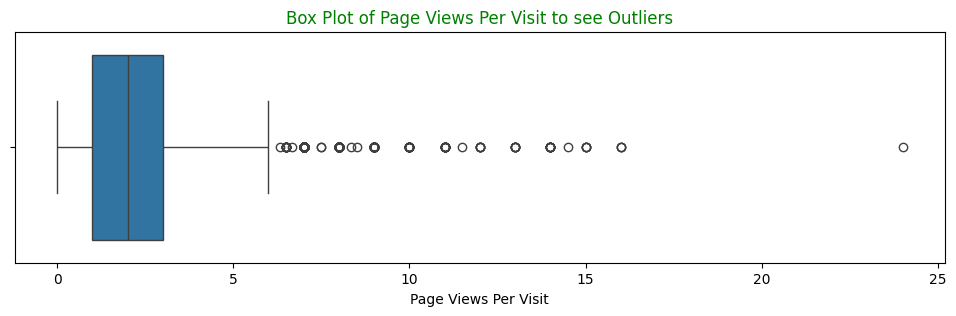

In [66]:
# checking outliers for Page Views Per Visit 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score['Page Views Per Visit'])
plt.title('Box Plot of Page Views Per Visit', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

In [67]:
lead_score['Page Views Per Visit'].quantile(0.99)

9.0

In [73]:
# check the dataset for values of Page Views Per Visit above 15
lead_score[lead_score['Page Views Per Visit'] > 15]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.0,Olark Chat Conversation,Not Provided,Unemployed,No,No,No,No,No,No,No,Not Specified,No,Modified
5164,7b9369a0-b997-41f0-8a04-68677de0f1c8,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,Page Visited on Website,Finance and Banking,Unemployed,No,No,No,No,No,No,No,Mumbai,Yes,Modified
5495,48a5b72c-db78-48ab-bb15-8210754102ab,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,Page Visited on Website,Business Administration and IT,Unemployed,No,No,No,No,No,No,No,Other Cities of Maharashtra,Yes,Modified
6805,57c557f0-f373-4468-affb-3ed5a03ea47c,597579,API,Organic Search,No,No,1,24.0,1527,24.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,Not Specified,No,Modified


-  Above the 99th percentile there are many leads that have been converted, so removing those datapoints, might lead to unnecessary data loss, the datapoints above 15 seem to have some error, thus we remove these datapoints to avoid inaccuracies.

In [74]:
# Filter the DataFrame to include only rows where Page Views Per Visit is less than or equal to 15
lead_score = lead_score[lead_score['Page Views Per Visit'] <= 15]

In [76]:
# check size
lead_score.shape

(9060, 23)

In [ ]:
# convert yes/no to 1/0

In [ ]:
# create dummy variables

In [ ]:
# check imbalance

In [ ]:
# remove Prospect ID and Lead Number

In [ ]:
# split dataframe into two sub-dataframes for eda

# EDA

# Model Building

# Model Evaluation